<a href="https://colab.research.google.com/github/snehapranathi21/employee-salary-predictor/blob/main/Emp_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv("/content/Salary_Data.csv")
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
data.shape


(6704, 6)

In [ ]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
data.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [ ]:
data.isna().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [ ]:
data.duplicated().sum()

np.int64(4911)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data ["Gender"].value_counts()

,count
Gender,
Male,966
Female,814
Other,7


In [ ]:

data ["Gender"].value_counts()


,count
Gender,
Male,966
Female,814
Other,7


In [ ]:
data ["Education Level"].value_counts()


,count
Education Level,
Bachelor's Degree,506
Master's Degree,446
PhD,340
Bachelor's,262
Master's,122
High School,110
phD,1


In [ ]:
data ["Age"].value_counts()

,count
Age,
29.0,106
28.0,104
33.0,104
27.0,104
31.0,102
30.0,92
26.0,90
36.0,81
32.0,78


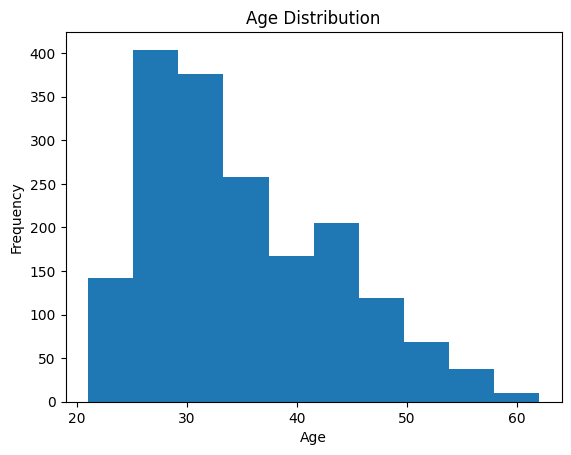

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data["Age"])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:
data.groupby("Job Title")["Salary"].mean().sort_values(ascending=False).head(8)


,Salary
Job Title,
CEO,250000.0
Chief Technology Officer,250000.0
Chief Data Officer,220000.0
Director,200000.0
Director of Data Science,200000.0
VP of Finance,200000.0
Operations Director,190000.0
VP of Operations,190000.0


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder=LabelEncoder()
le_gender = LabelEncoder()
le_edu = LabelEncoder()
le_job = LabelEncoder()

data['Gender'] = le_gender.fit_transform(data['Gender'])
data['Education Level'] = le_edu.fit_transform(data['Education Level'])
data['Job Title'] = le_job.fit_transform(data['Job Title'])

In [ ]:
X = data[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = data['Salary']

In [ ]:
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predictions
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

# Metrics
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("R2 Score:", r2_score(y_test, lr_pred))

print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("R2 Score:", r2_score(y_test, rf_pred))


if 'predict1' in locals():
    print("\nLogistic Regression:")
    print("MAE:", mean_absolute_error(y_test, predict1))
    print("R2 Score:", r2_score(y_test, predict1))

Linear Regression:
MAE: 23098.038367719786
R2 Score: 0.6620641110461878

Random Forest:
MAE: 10824.196019426105
R2 Score: 0.8954920619340226


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Predictions
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

# KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("KNN Model Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

KNN Model Evaluation:
MAE: 15389.117318435754
MSE: 515833250.8093855
R2 Score: 0.8117355880101333


In [ ]:
import joblib
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump({'gender': le_gender, 'edu': le_edu, 'job': le_job}, 'encoders.pkl')


['encoders.pkl']

In [ ]:
!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
# app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Config
st.set_page_config(page_title="Salary Predictor", layout="wide")
st.title("💼 Employee Salary Prediction App")

# Load dataset
df = pd.read_csv("Salary_Data.csv")
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Encode categorical variables
le_gender = LabelEncoder().fit(df["Gender"])
le_edu = LabelEncoder().fit(df["Education Level"])
le_job = LabelEncoder().fit(df["Job Title"])
df["Gender"] = le_gender.transform(df["Gender"])
df["Education Level"] = le_edu.transform(df["Education Level"])
df["Job Title"] = le_job.transform(df["Job Title"])

# Features and Target
X = df.drop("Salary", axis=1)
y = df["Salary"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Evaluation
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Sidebar
st.sidebar.header("📊 Data Criteria")
age_range = st.sidebar.slider("Age Range", int(df["Age"].min()), int(df["Age"].max()), (25, 40))
exp_range = st.sidebar.slider("Experience Range", 0, 40, (0, 10))
genders = st.sidebar.multiselect("Gender", le_gender.classes_, default=list(le_gender.classes_))

# Filtered Data
filtered = df.copy()
filtered["Gender"] = le_gender.inverse_transform(filtered["Gender"])
filtered = filtered[
    (filtered["Age"] >= age_range[0]) & (filtered["Age"] <= age_range[1]) &
    (filtered["Years of Experience"] >= exp_range[0]) &
    (filtered["Years of Experience"] <= exp_range[1]) &
    (filtered["Gender"].isin(genders))
]

# Visualizations
col1, col2 = st.columns(2)
with col1:
    st.subheader("Salary Distribution")
    fig1, ax1 = plt.subplots()
    sns.histplot(filtered["Salary"], kde=True, ax=ax1, color="blue")
    st.pyplot(fig1)

with col2:
    st.subheader("Average Salary by Job Title")
    job_avg = filtered.groupby("Job Title")["Salary"].mean().sort_values(ascending=False)
    fig2, ax2 = plt.subplots(figsize=(10, 5))
    job_avg.plot(kind='bar', color='green', ax=ax2)
    ax2.set_ylabel("Average Salary")
    st.pyplot(fig2)

# Prediction Form
st.subheader("🎯 Predict Employee Salary")
with st.form("prediction_form"):
    age = st.slider("Age", 18, 65, 30)
    gender = st.selectbox("Gender", le_gender.classes_)
    edu = st.selectbox("Education Level", le_edu.classes_)
    job = st.selectbox("Job Title", le_job.classes_)
    exp = st.slider("Years of Experience", 0, 40, 5)
    submitted = st.form_submit_button("Predict Salary")

    if submitted:
        input_df = pd.DataFrame([[age,
                                  le_gender.transform([gender])[0],
                                  le_edu.transform([edu])[0],
                                  le_job.transform([job])[0],
                                  exp]],
                                columns=X.columns)
        salary = model.predict(input_df)[0]
        st.success(f"Predicted Salary: ₹{salary:,.2f}")

        # Download Prediction
        download_df = pd.DataFrame.from_dict({
            "Age": [age],
            "Gender": [gender],
            "Education Level": [edu],
            "Job Title": [job],
            "Experience": [exp],
            "Predicted Salary": [salary]
        })


# Model evaluation section
st.subheader("📈 Model Evaluation")
st.write(f"**Training Score (R²):** {train_score:.2f}")
st.write(f"**Test Score (R²):** {test_score:.2f}")
st.write(f"**Mean Squared Error:** {mse:.2f}")
st.write(f"**R² Score on Test Set:** {r2:.2f}")



Overwriting app.py


In [ ]:
!ngrok config add-authtoken 302XYSy2pd2n54HTFA9PiA24zBs_7AKUjStPqRWScQ9puCcQL


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
import time
from pyngrok import ngrok

# Start Streamlit
os.system("streamlit run app.py &")

# Wait for server to start
time.sleep(5)

# Create tunnel
public_url = ngrok.connect(8501, "http")
print("🔗 Streamlit App URL:", public_url)


🔗 Streamlit App URL: NgrokTunnel: "https://e1754fd503c4.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!killall ngrok

In [ ]:
!streamlit run app.py &> /dev/null &

After running the above cell to stop the ngrok process, you can try running the cell to start the Streamlit app and create the ngrok tunnel again.

In [ ]:
from google.colab import files
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("scaler.pkl")
files.download("encoders.pkl")
files.download("knn_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
! pip install streamlit -q
!wget -q -O - ipv4.icanhazip.com
! streamlit run app.py & npx localtunnel --port 8501

In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.31.254.1


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.31.254.1:8501

⠴⠦⠧⠇⠏Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y)   Stopping...
^C
